In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as trade_api
from MCForecastTools import MCSimulation
from alpaca_trade_api.rest import REST, TimeFrame
import json
import numpy as np

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price 
btc_response_data= requests.get(btc_url)
btc_response_data.content
btc_response_content = btc_response_data.content 
btc_response_data = btc_response_data.json()
btc_price_cad = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]
print(f"BTC_price_cad:${btc_price_cad}")

# Fetch current ETH price
eth_response_data= requests.get(eth_url)
eth_response_data.content
eth_response_content = eth_response_data.content 
eth_response_data = eth_response_data.json()
eth_price_cad = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(f"ETH_price_cad:${eth_price_cad}")

# Compute current value of my crpto
my_btc_value = my_btc*btc_price_cad
my_eth_value = my_eth*eth_price_cad

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

BTC_price_cad:$57931.292
ETH_price_cad:$4351.16324
The current value of your 1.2 BTC is $69517.55
The current value of your 5.3 ETH is $23061.17


In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = trade_api.REST(alpaca_api_key,alpaca_secret_key,api_version = "v2")
alpaca=trade_api.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API 
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_tickers = alpaca.get_bars(tickers, TimeFrame.Day, start="2021-04-01", end=today).df

# Reorganize the DataFrame
AGG = df_tickers[df_tickers['symbol']=='AGG'].drop(columns=['symbol','trade_count','vwap'],axis=1)
SPY = df_tickers[df_tickers['symbol']=='SPY'].drop(columns=['symbol','trade_count','vwap'], axis=1)


# Concatenate the ticker DataFrames
df_tickers = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_tickers.index.name = "time"

# Preview DataFrame
df_tickers

AGG                                       \
                             open      high      low   close    volume   
time                                                                     
2021-04-01 04:00:00+00:00  113.93  114.0500  113.830  114.04  10766423   
2021-04-05 04:00:00+00:00  113.84  113.8900  113.690  113.81   9229625   
2021-04-06 04:00:00+00:00  113.98  114.2200  113.950  114.21   4859922   
2021-04-07 04:00:00+00:00  114.12  114.2584  114.025  114.03   4502694   
2021-04-08 04:00:00+00:00  114.18  114.3100  114.130  114.31   4932134   
...                           ...       ...      ...     ...       ...   
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36   8540551   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  11396549   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  11544378   
2022-03-31 04:00:00+00:00  107.19  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                              SPY                                       
                             open     high      low   close     volume  
time                                                                    
2021-04-01 04:00:00+00:00  398.34  400.670  398.180  400.61   99157757  
2021-04-05 04:00:00+00:00  403.49  406.940  403.380  406.36   91242966  
2021-04-06 04:00:00+00:00  405.83  407.240  405.400  406.12   61766326  
2021-04-07 04:00:00+00:00  405.95  406.960  405.450  406.59   55311029  
2021-04-08 04:00:00+00:00  407.92  408.580  406.930  408.52   57220303  
...                           ...      ...      ...     ...        ...  
2022-03-28 04:00:00+00:00  452.05  455.910  450.060  455.84   68744767  
2022-03-29 04:00:00+00:00  460.07  462.070  457.180  461.53   86682895  
2022-03-30 04:00:00+00:00  460.29  461.195  456.465  458.79   79668682  
2022-03-31 04:00:00+00:00  457.92  458.760  451.160  452.11  118607132  
2022-04-01 04:00:00+00:00  453.30  453.460  449.140  452.92   88676014  

[254 rows x 10 columns]

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_tickers["AGG"]["close"]["2022-04-01"])
spy_close_price = float(df_tickers["SPY"]["close"]["2022-04-01"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $106.75
Current SPY closing price: $452.92


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22646.00
The current value of your 200 AGG shares is $21350.00


In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto= my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
data = {'':['crypto','shares'], 'amount': [total_crypto, total_shares]}  

# Create savings DataFrame
df_savings = pd.DataFrame(data)
df_savings = df_savings.set_index([''])

# Display savings DataFrame
display(df_savings)

,amount
,
crypto,92578.715572
shares,43996.000000


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

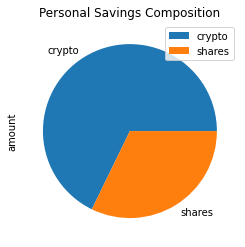

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y= "amount", title="Personal Savings Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"Required Emergency Fund: ${emergency_fund:0.2f}")

# Calculate total amount of savings
total_savings = total_crypto + total_shares
print(f"Total Savings: ${total_savings:0.2f}")

# Validate saving health
if total_savings>emergency_fund: 
    print (f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund: 
    print (f"Congratulations! Your savings are equal to your emergency fund.")
else:
    print (f"Keep going! You are {emergency_fund - total_savings} away from a fully funded emergency fund.")

Required Emergency Fund: $36000.00
Total Savings: $136574.72
Congratulations! You have enough money in your emergency fund.


In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(tickers, TimeFrame.Day, start="2017-04-01", end="2022-04-01").df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop(columns=['symbol','trade_count','vwap'],axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop(columns=['symbol','trade_count','vwap'], axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_stock_data.index.name = "time"

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2017-04-03 04:00:00+00:00  108.31  108.68  108.300  108.67  5198006  235.79   
2017-04-04 04:00:00+00:00  108.61  108.65  108.520  108.57  1627492  235.00   
2017-04-05 04:00:00+00:00  108.48  108.74  108.453  108.69  2304074  236.26   
2017-04-06 04:00:00+00:00  108.64  108.71  108.480  108.68  1725301  234.96   
2017-04-07 04:00:00+00:00  108.80  108.89  108.420  108.44  1783599  235.18   

                                                               
                             high      low   close     volume  
time                                                           
2017-04-03 04:00:00+00:00  236.03  233.910  235.33   85546486  
2017-04-04 04:00:00+00:00  235.58  234.555  235.48   56466195  
2017-04-05 04:00:00+00:00  237.39  234.540  234.78  108800604  
2017-04-06 04:00:00+00:00  236.04  234.425  235.44   69135757  
2017-04-07 04:00:00+00:00  236.00  234.640  235.20   74412311

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
time                                                                  
2017-04-03 04:00:00+00:00  108.31  108.68  108.300  108.67  5198006   
2017-04-04 04:00:00+00:00  108.61  108.65  108.520  108.57  1627492   
2017-04-05 04:00:00+00:00  108.48  108.74  108.453  108.69  2304074   
2017-04-06 04:00:00+00:00  108.64  108.71  108.480  108.68  1725301   
2017-04-07 04:00:00+00:00  108.80  108.89  108.420  108.44  1783599   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-04-03 04:00:00+00:00          NaN  235.79  236.03  233.910  235.33   
2017-04-04 04:00:00+00:00    -0.000920  235.00  235.58  234.555  235.48   
2017-04-05 04:00:00+00:00     0.001105  236.26  237.39  234.540  234.78   
2017-04-06 04:00:00+00:00    -0.000092  234.96  236.04  234.425  235.44   
2017-04-07 04:00:00+00:00    -0.002208  235.18  236.00  234.640  235.20   

                                                   
                              volume daily_return  
time                                               
2017-04-03 04:00:00+00:00   85546486          NaN  
2017-04-04 04:00:00+00:00   56466195     0.000637  
2017-04-05 04:00:00+00:00  108800604    -0.002973  
2017-04-06 04:00:00+00:00   69135757     0.002811  
2017-04-07 04:00:00+00:00   74412311    -0.001019

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Owner\Class Notes\Unit 5_Assignment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995417,1.011144,1.004624,1.001751,1.000912,1.008037,1.007059,0.987731,0.998505,1.002380,...,1.001498,0.990596,1.000368,1.003289,0.993842,0.995820,0.998977,1.002800,0.993095,1.004168
2,0.993924,1.012919,1.009525,0.998483,0.996280,1.006770,1.011303,0.967952,0.986282,1.000018,...,0.995336,0.985523,0.998564,1.000545,0.985495,0.999441,0.993118,1.000975,0.988699,1.011736
3,0.998708,1.010158,1.011748,1.001814,0.997691,0.989102,1.023193,0.964106,0.985543,0.996995,...,1.003281,0.990770,0.996478,0.992369,0.978442,1.000063,0.998291,1.017981,1.002765,1.014205
4,1.006341,0.991664,1.016955,0.999994,1.004207,0.985867,1.020669,0.960198,0.993494,0.990179,...,1.003469,0.991828,1.016315,0.993891,0.987823,0.991433,1.006687,1.013955,1.000374,1.012612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.628942,5.235994,6.481652,24.473088,8.661711,6.685010,14.382016,32.408728,17.585573,12.877476,...,4.958350,27.808661,15.285102,13.682870,33.122727,7.436171,9.993005,7.289096,24.547363,6.302715
7557,18.553395,5.234795,6.500757,24.430184,8.728596,6.682152,14.491427,32.485133,17.575611,12.829340,...,4.955571,28.245353,15.103962,13.675550,32.760661,7.410121,10.030806,7.291187,24.062057,6.321712
7558,18.679883,5.186861,6.432642,24.519576,8.735635,6.655633,14.434836,32.313441,17.398426,12.892267,...,4.959334,28.120175,15.155043,13.717497,32.428017,7.457697,9.921267,7.264149,23.976711,6.369389
7559,18.806452,5.231749,6.429633,24.213768,8.820215,6.701364,14.311573,32.546893,17.156410,13.158820,...,4.964253,28.126752,15.319356,13.595739,32.312561,7.590465,10.033504,7.193424,23.732917,6.291835


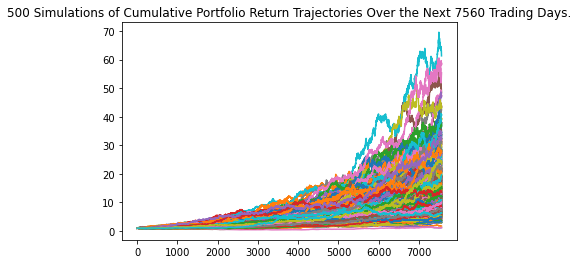

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

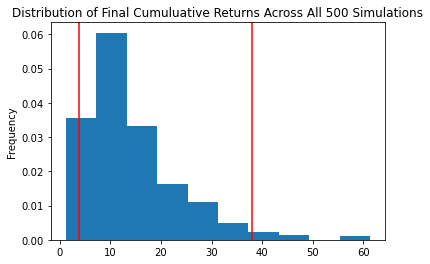

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             14.246592
std               9.228385
min               1.163598
25%               7.817131
50%              11.886443
75%              18.148211
max              61.332556
95% CI Lower      3.684536
95% CI Upper     37.927799
Name: 7560, dtype: float64


In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistics[8]*initial_investment,2)
ci_upper = round(summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $73690.72 and $758555.98


In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_statistics[8]*initial_investment,2)
ci_upper = round(summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $110536.08 and $1137833.97


In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns (assume 20% more stock) 
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Owner\Class Notes\Unit 5_Assignment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988185,1.007779,1.008795,0.992782,1.000370,0.990778,1.010047,1.006193,1.015600,0.994195,...,0.997625,1.003509,0.996051,0.997019,1.002771,0.993770,1.000038,1.004259,0.995239,1.007417
2,0.973513,1.006682,1.000941,0.985924,1.019445,0.997209,1.012470,1.019367,1.010154,0.999297,...,1.003000,1.011948,0.996425,0.998686,1.006784,0.994156,0.998396,0.985347,0.987346,1.015034
3,0.991577,0.999202,1.008372,0.982323,1.044631,1.007747,0.987361,1.019240,1.008194,1.000651,...,0.999549,1.022826,0.994362,1.000395,1.025290,1.008712,0.994173,0.976335,0.970601,1.010015
4,0.982474,0.975602,1.022328,0.992591,1.065568,0.997403,0.996455,1.018662,1.017939,1.010888,...,0.991082,1.027852,0.989091,1.003623,1.027102,1.009219,1.003276,0.991532,0.973953,1.014472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.012306,1.345576,1.523556,1.444666,1.338998,1.915607,1.394122,1.339128,2.303307,2.853812,...,1.705114,1.026956,1.593740,1.076946,1.200545,1.923820,2.225125,2.054504,1.424058,2.056083
1257,1.019415,1.361939,1.524482,1.453931,1.353339,1.902750,1.375312,1.332704,2.283719,2.831461,...,1.705251,1.032822,1.608660,1.081850,1.207420,1.931325,2.218514,2.025651,1.425462,2.079130
1258,1.041006,1.366590,1.513924,1.449079,1.344592,1.905494,1.367877,1.343047,2.294248,2.824935,...,1.684815,1.019966,1.603582,1.082566,1.217109,1.976917,2.227113,1.995969,1.403868,2.067532
1259,1.042088,1.356699,1.497031,1.468065,1.361146,1.898207,1.379800,1.325578,2.318372,2.804577,...,1.678077,1.022489,1.622846,1.061186,1.217970,1.991607,2.252374,2.007105,1.400202,2.063933


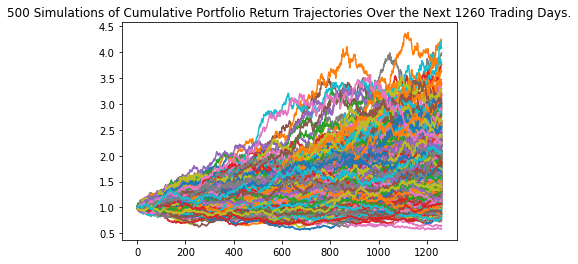

In [26]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

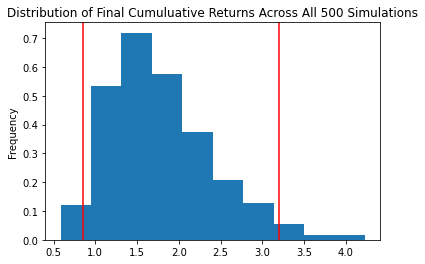

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [28]:
 # Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_five)

count           500.000000
mean              1.791642
std               0.620252
min               0.583757
25%               1.330776
50%               1.676027
75%               2.172851
max               4.227794
95% CI Lower      0.857671
95% CI Upper      3.201899
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_statistics_five[8]*initial_investment,2)
ci_upper_five = round(summary_statistics_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51460.27 and $192113.93


In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns (assume 70% stock)
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Owner\Class Notes\Unit 5_Assignment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016022,0.998149,1.002617,1.008136,0.995130,1.012762,1.012542,0.991251,0.991011,0.987175,...,1.005012,0.999119,0.996607,1.010315,1.004708,1.008502,0.996428,1.004734,1.009624,0.997323
2,1.013136,1.000679,1.014454,1.004637,0.987695,1.013623,1.017816,0.988986,0.989250,0.973250,...,1.009790,1.010848,0.984339,1.017960,1.010869,1.007080,1.015528,0.999887,1.004216,0.990989
3,1.006433,1.004499,1.010636,1.014112,0.989594,1.021492,1.014488,0.968875,0.989604,0.979640,...,1.025372,1.000265,0.970382,1.022009,1.013321,1.007110,1.005039,0.996860,1.013505,0.987459
4,1.014662,0.999216,1.014120,1.007955,0.979409,1.015505,1.018318,0.992797,1.002216,0.978802,...,1.035034,0.991629,0.979600,1.022768,1.011872,1.009680,0.994664,0.982889,1.027742,0.995532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.593671,0.850759,3.122536,4.174128,1.595014,2.029363,3.254319,1.937733,1.802929,2.488725,...,3.068379,1.789606,3.281992,3.088524,3.259364,1.413251,1.679501,0.786083,3.119370,5.472912
2517,2.598370,0.859240,3.136583,4.205621,1.612085,2.039747,3.251074,1.899122,1.820154,2.483615,...,3.015334,1.786231,3.316230,3.110538,3.295687,1.439178,1.684756,0.789247,3.169130,5.435662
2518,2.587959,0.859420,3.133488,4.164740,1.614616,2.050234,3.227746,1.897676,1.823703,2.476630,...,3.038308,1.802487,3.319831,3.169634,3.314338,1.450583,1.669898,0.798942,3.147397,5.426384
2519,2.589646,0.861002,3.121523,4.191890,1.620310,2.075916,3.259000,1.875131,1.858232,2.491729,...,3.038036,1.804220,3.312984,3.183768,3.302008,1.436995,1.654794,0.795596,3.183475,5.353866


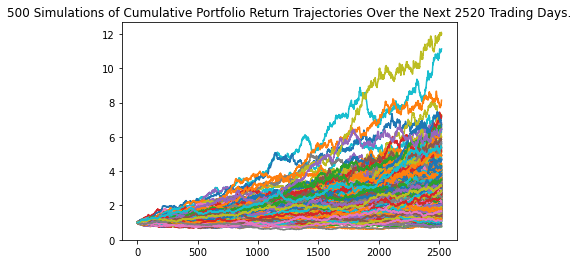

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

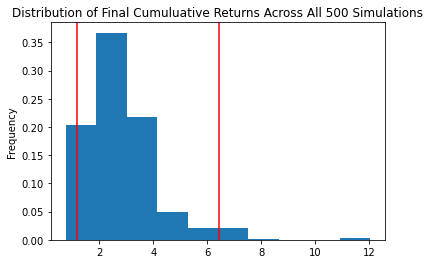

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_ten)

count           500.000000
mean              2.815279
std               1.333273
min               0.757319
25%               1.933234
50%               2.597339
75%               3.339379
max              12.034895
95% CI Lower      1.159625
95% CI Upper      6.441201
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_statistics_ten[8]*initial_investment,2)
ci_upper_ten = round(summary_statistics_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69577.5 and $386472.04
